In [46]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os

In [47]:
data_path = '/home/earthquakes1/homes/Rebecca/phd/stf/data/USGS/'

In [62]:
eq_list = os.listdir(data_path)
eq_list = [x for x in eq_list if (x.endswith('.txt') and not x.endswith('notes.txt') and not x.endswith('catalog.txt'))]

In [63]:
eq_list

['20190301_085042_alt.txt',
 '20230908_221101.txt',
 '20101221_171940.txt',
 '20120905_144207.txt',
 '20070815_234057.txt',
 '20180216_233939.txt',
 '20000618_144413.txt',
 '20190526_074115.txt',
 '20160302_124948.txt',
 '20181205_041808.txt',
 '20030821_121249.txt',
 '20190222_101723.txt',
 '19990930_163115.txt',
 '20220904_094218.txt',
 '20220331_054401.txt',
 '20220914_110406.txt',
 '20100509_055941.txt',
 '20000604_162826.txt',
 '20151204_222500.txt',
 '20221220_103424.txt',
 '20180225_174444.txt',
 '20101025_144222.txt',
 '19980104_061158.txt',
 '20070912_111026.txt',
 '20140418_142724.txt',
 '20160819_073222.txt',
 '20130416_104420.txt',
 '20161217_105110.txt',
 '19930808_083424.txt',
 '20021010_105020.txt',
 '20210119_024622.txt',
 '20100612_192650.txt',
 '20241110_164950.txt',
 '20241205_184421.txt',
 '20180123_093140.txt',
 '20070113_042321.txt',
 '20150512_070519.txt',
 '20110407_143243.txt',
 '20140412_201439.txt',
 '19971014_095318.txt',
 '19980503_233021.txt',
 '20210119_0

In [85]:
for eq in eq_list:
	momentrate = []
	time = []
	if eq.startswith('201903'):
		print(eq)

20190301_085042_alt.txt
20190301_085042.txt


In [91]:
momentrate

[]

In [90]:
len(np.arange(0, max(momentrate), step = max(momentrate)/100))


ValueError: max() arg is an empty sequence

In [87]:
len(max(momentrate)/100)
len(np.arange(0, 100, step=1))

ValueError: max() arg is an empty sequence

Error with 19971205_112654.txt
Error with 20170919_181438.txt
Error with 19930115_110605.txt
Error with 20190301_085042.txt
Error with 20180928_100245.txt
Error with 20210213_140749.txt
Error with 20150425_061125.txt
Error with 20050926_015537.txt
Error with 20190222_101723_alt.txt
Error with 19971108_100252.txt


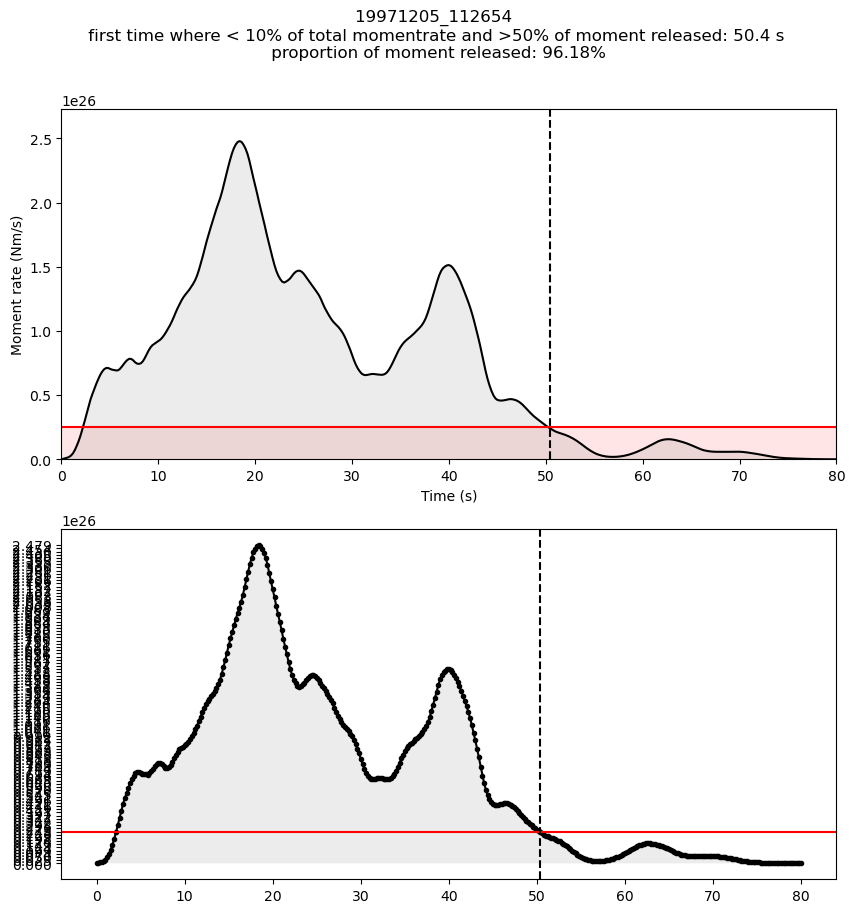

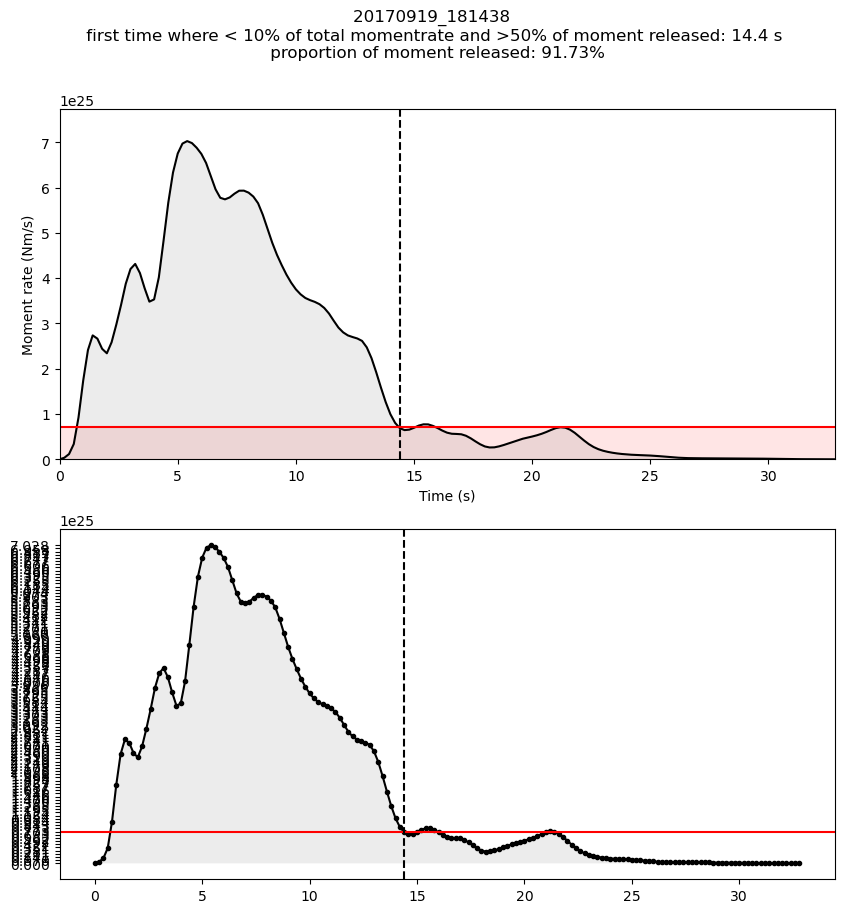

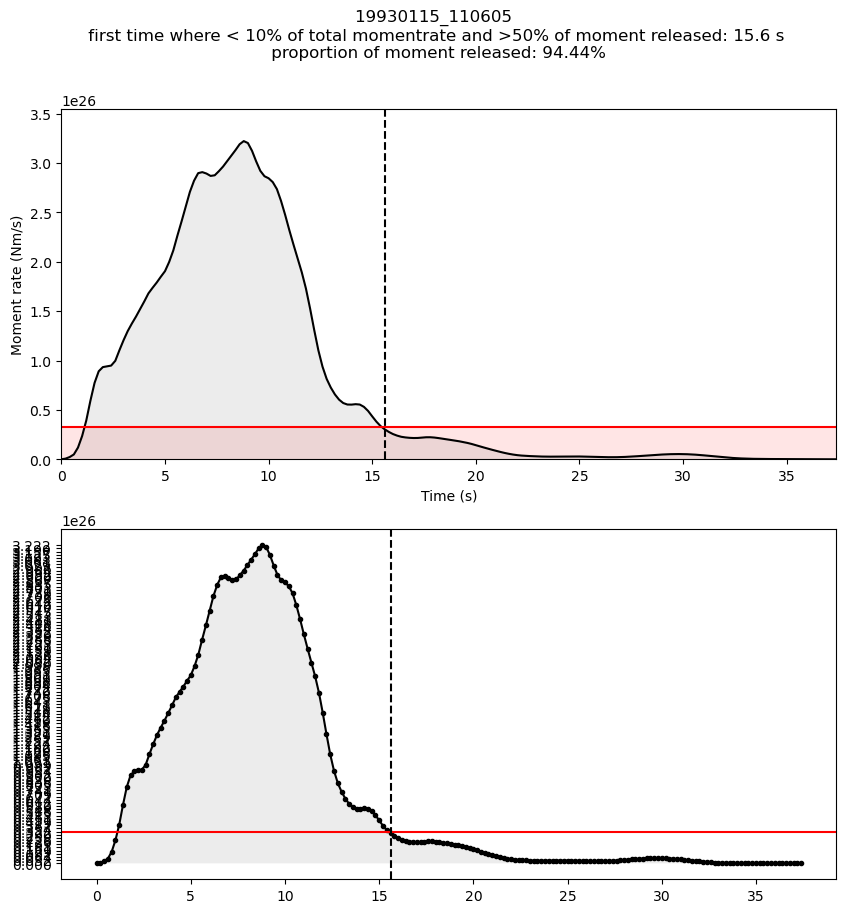

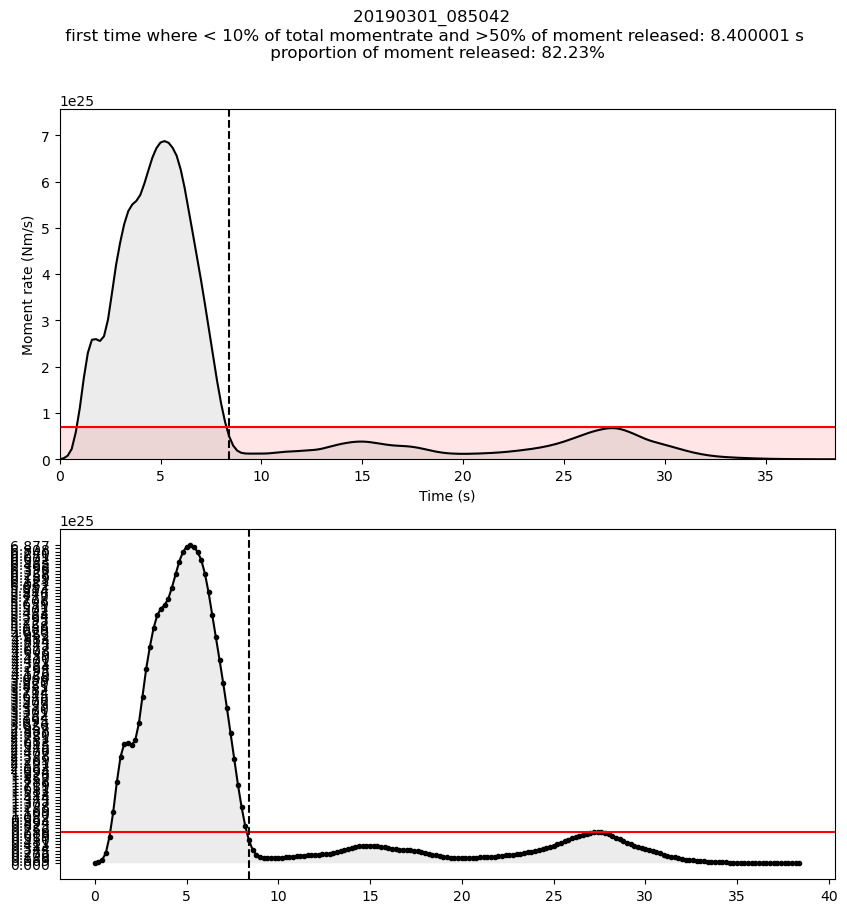

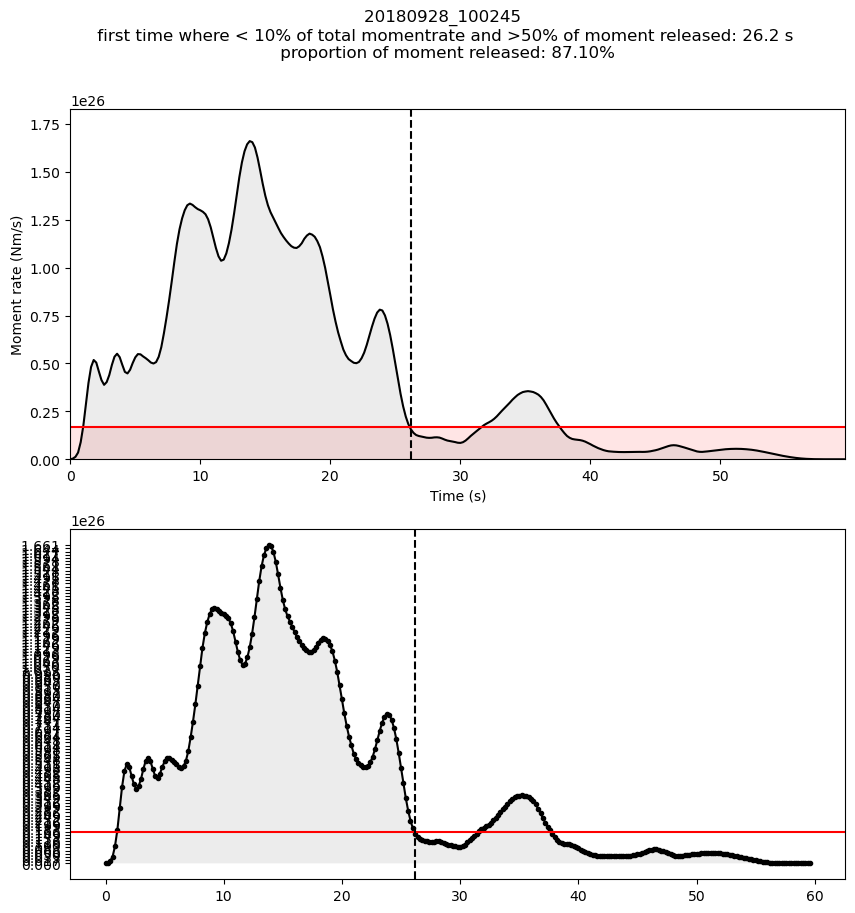

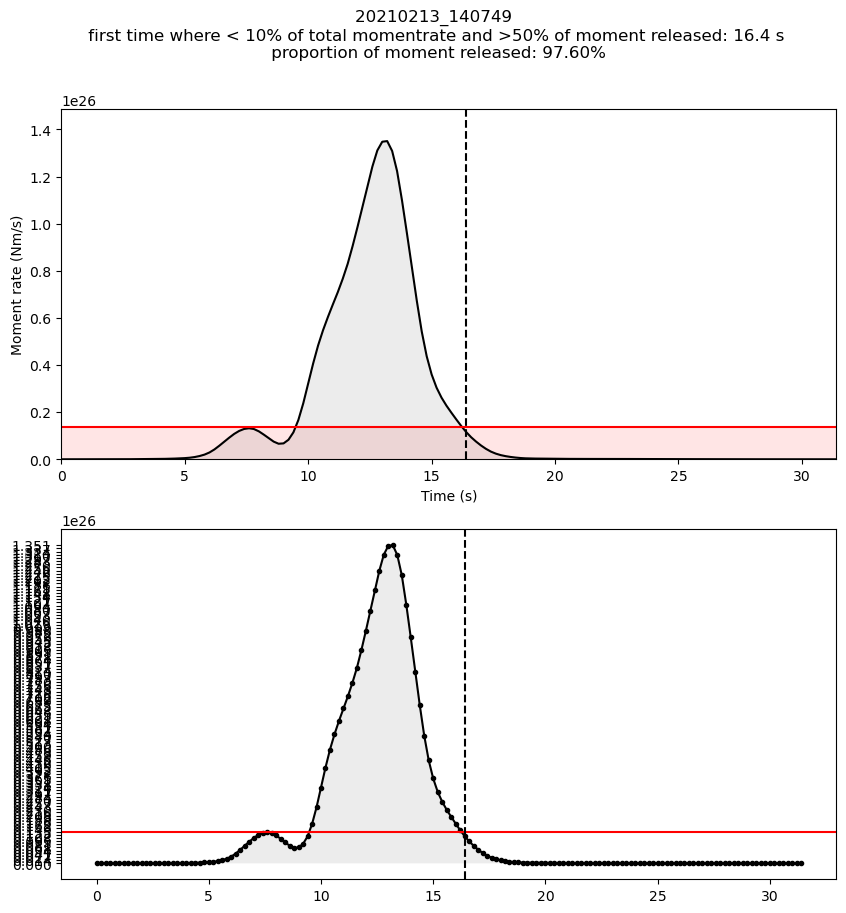

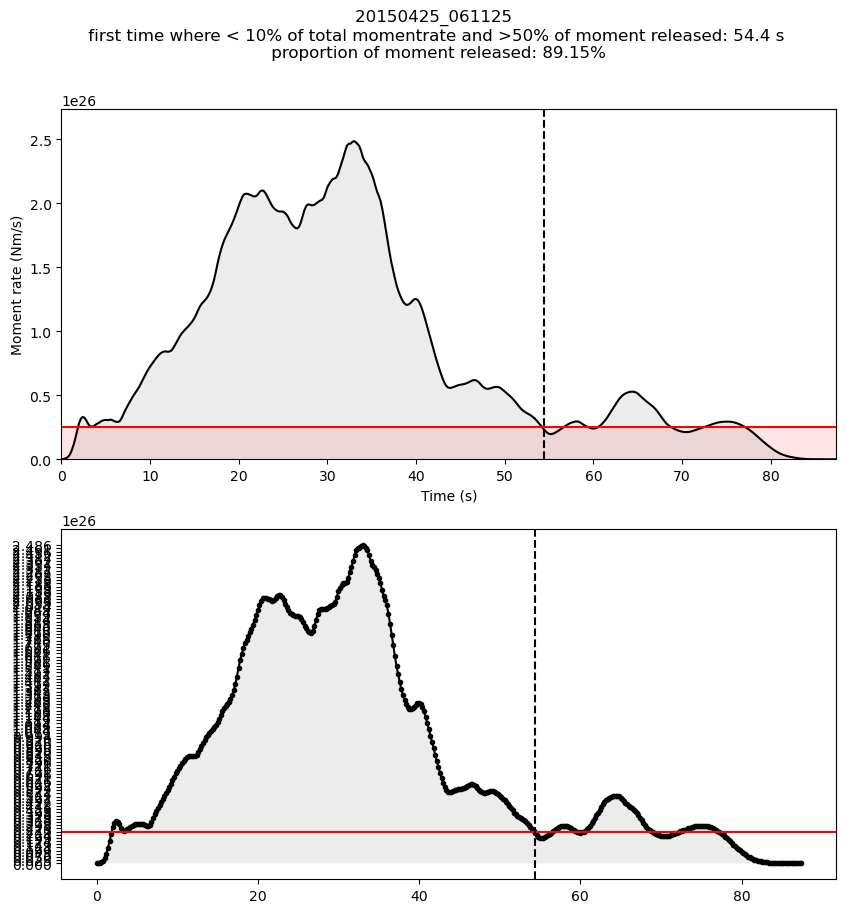

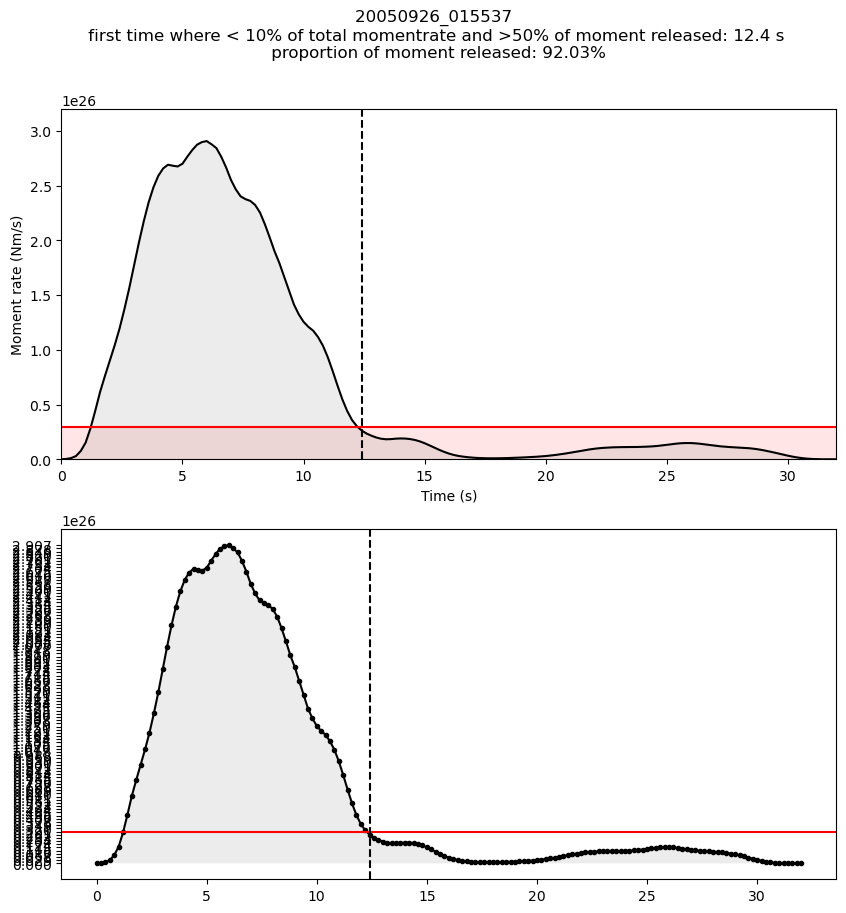

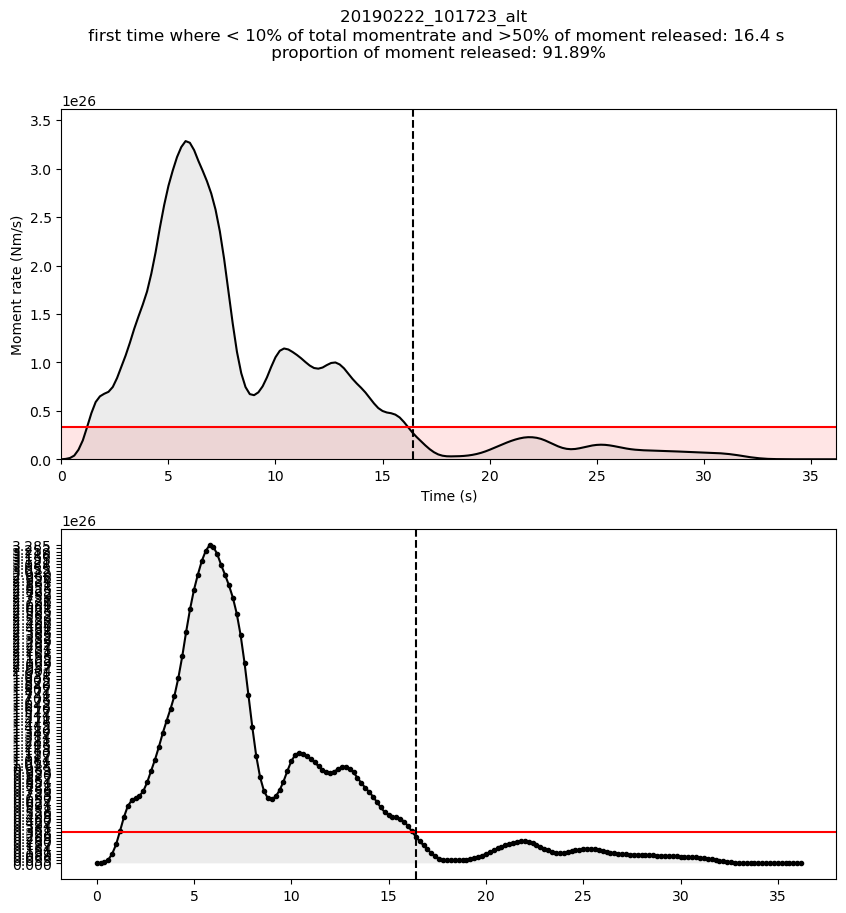

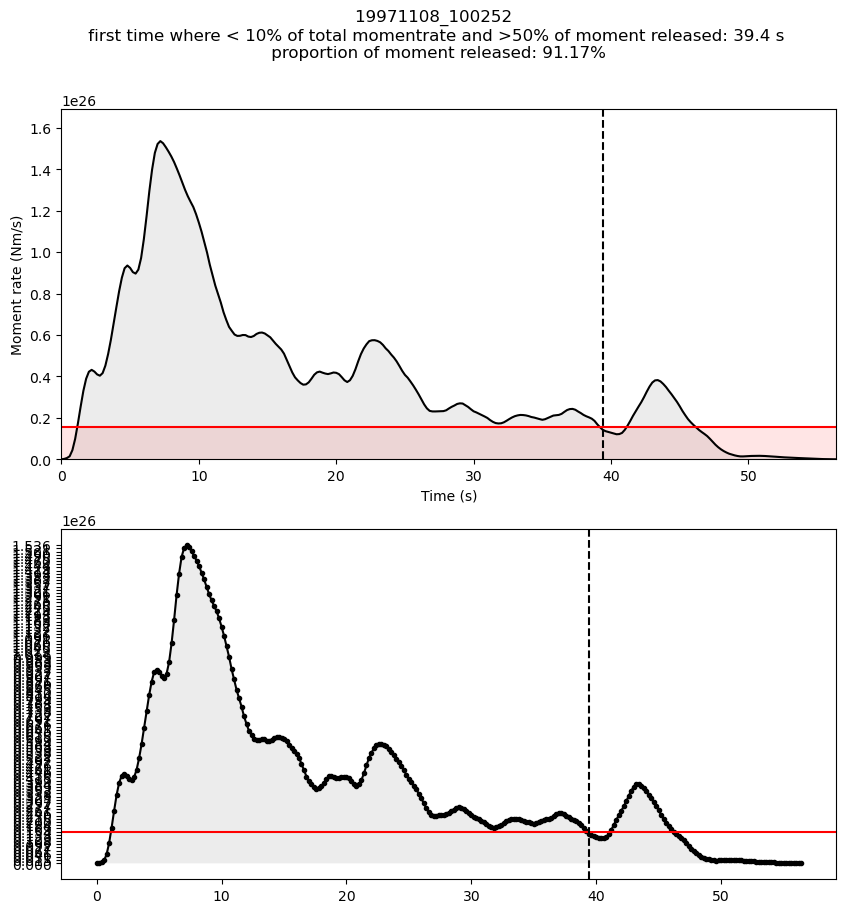

In [94]:
for eq in eq_list:
    try:
        momentrate = []
        time = []

        with open(data_path + eq, 'r') as f:
            data = f.readlines()
            for line in data:
                line = line.strip()
                line = line.rstrip()
                if line[0] not in ['0','1','2','3','4','5','6','7','8','9']:
                    continue
                line = line.split()
                time.append(float(line[0]))
                momentrate.append(float(line[1]))

            momentrate = np.array(momentrate)
            time = np.array(time)

            not_zero = np.where(momentrate > 0)[0]

            start = min(not_zero)
            end = max(not_zero)

            time = time[:end]
            momentrate = momentrate[:end]

        less_than_10 = np.where(momentrate <= 10*max(momentrate)/100)[0]

        total_moment = scipy.integrate.simpson(momentrate[0:end],
                                            dx = time[1]-time[0])

        for i in less_than_10:
            if i == 0:
                continue
            moment = scipy.integrate.simpson(momentrate[0:i],
                                            dx = time[1]-time[0])
            if moment >= 0.5 * total_moment:
                #print(f'first time where < 10% of total momentrate and 50% of moment released: {time[i]} s')
                detected_end_time = time[i]
                detected_end = i
                #print(f'proportion of moment released: {(moment/total_moment)*100:.2f}%')
                break


        fig, axs = plt.subplots(2, 1, figsize=(10, 10))

        fig.suptitle(f'{eq[:-4]} \n first time where < 10% of total momentrate and >50% of moment released: {time[i]} s \n proportion of moment released: {(moment/total_moment)*100:.2f}%')
        axs[0].plot(time, momentrate, color='k')
        axs[0].axhline(max(momentrate)/10, color='r')
        axs[0].fill_between(time, 0, 10*max(momentrate)/100, facecolor='red', alpha=0.1)

        axs[0].fill_between(time, momentrate, 0, where=momentrate>0, facecolor='grey', alpha=0.15)

        axs[0].axvline(detected_end_time, color='k', linestyle='--')
        axs[0].set_ylabel('Moment rate (Nm/s)')
        axs[0].set_xlabel('Time (s)')

        axs[0].set_ylim(0, 1.1*max(momentrate))
        axs[0].set_xlim(0, max(time))

        axs[1].plot(time, momentrate, color='k', marker = '.')
        axs[1].fill_between(time,
                        momentrate, 0,
                        facecolor='grey',
                        alpha=0.15)

        axs[1].axhline(max(momentrate)/10, color='r', label='10% of max moment rate')

        axs[1].axvline(detected_end_time, color='k', linestyle='--')

        axs[1].set_yticks(np.arange(0, max(momentrate),
                step=max(momentrate)/100),
                np.arange(0, 100, step=1))

        axs[1].set_xlim(detected_end_time-2, detected_end_time+2)
        axs[1].set_ylim([max(momentrate)/12, max(momentrate)/8])

        axs[1].fill_between(time, 0, 10*max(momentrate)/100, facecolor='red', alpha=0.1)

        axs[1].set_ylabel('Relative moment rate (Nm/s)')
        axs[1].set_xlabel('Time (s)')
        axs[1].legend()

        plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/USGS/{eq[:-4]}_momentrate.png')
        plt.close()
    except Exception:
        print(f'Error with {eq}')

In [95]:
problems = ['19971205_112654.txt', '20170919_181438.txt', '19930115_110605.txt', '20190301_085042.txt', '20180928_100245.txt', '20210213_140749.txt', '20150425_061125.txt', '20050926_015537.txt', '20190222_101723_alt.txt', '19971108_100252.txt']


In [99]:
for eq in problems:
	momentrate = []
	time = []

	with open(data_path + eq, 'r') as f:
		data = f.readlines()
		for line in data:
			line = line.strip()
			line = line.rstrip()
			if line[0] not in ['0','1','2','3','4','5','6','7','8','9']:
				continue
			line = line.split()
			time.append(float(line[0]))
			momentrate.append(float(line[1]))

		momentrate = np.array(momentrate)
		time = np.array(time)

		not_zero = np.where(momentrate > 0)[0]

		start = min(not_zero)
		end = max(not_zero)

		time = time[:end]
		momentrate = momentrate[:end]

	less_than_10 = np.where(momentrate <= 10*max(momentrate)/100)[0]

	total_moment = scipy.integrate.simpson(momentrate[0:end],
										dx = time[1]-time[0])

	for i in less_than_10:
		moment = scipy.integrate.simpson(momentrate[0:i],
										dx = time[1]-time[0])
		if moment >= 0.5 * total_moment:
			#print(f'first time where < 10% of total momentrate and 50% of moment released: {time[i]} s')
			detected_end_time = time[i]
			detected_end = i
			#print(f'proportion of moment released: {(moment/total_moment)*100:.2f}%')
			break


	fig, axs = plt.subplots(2, 1, figsize=(10, 10))

	fig.suptitle(f'{eq[:-4]} \n first time where < 10% of total momentrate and >50% of moment released: {time[i]} s \n proportion of moment released: {(moment/total_moment)*100:.2f}%')
	axs[0].plot(time, momentrate, color='k')
	axs[0].axhline(max(momentrate)/10, color='r')
	axs[0].fill_between(time, 0, 10*max(momentrate)/100, facecolor='red', alpha=0.1)

	axs[0].fill_between(time, momentrate, 0, where=momentrate>0, facecolor='grey', alpha=0.15)

	axs[0].axvline(detected_end_time, color='k', linestyle='--')
	axs[0].set_ylabel('Moment rate (Nm/s)')
	axs[0].set_xlabel('Time (s)')

	axs[0].set_ylim(0, 1.1*max(momentrate))
	axs[0].set_xlim(0, max(time))

	axs[1].plot(time, momentrate, color='k', marker = '.')
	axs[1].fill_between(time,
					momentrate, 0,
					facecolor='grey',
					alpha=0.15)

	axs[1].axhline(max(momentrate)/10, color='r', label='10% of max moment rate')

	axs[1].axvline(detected_end_time, color='k', linestyle='--')

	axs[1].set_yticks(np.arange(0, max(momentrate),
			step=max(momentrate)/100),
			np.arange(0, 101, step=1))

	axs[1].set_xlim(detected_end_time-2, detected_end_time+2)
	axs[1].set_ylim([max(momentrate)/12, max(momentrate)/8])

	axs[1].fill_between(time, 0, 10*max(momentrate)/100, facecolor='red', alpha=0.1)

	axs[1].set_ylabel('Relative moment rate (Nm/s)')
	axs[1].set_xlabel('Time (s)')
	axs[1].legend()

	plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/USGS/{eq[:-4]}_momentrate.png')
	plt.close()
